# Creazione modelli per previsione SQUAT
> Decision TreeClassifier

> Logistic Regression 

> Regressione lineare multivariata

In [218]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

In [219]:
max_lunghezza_albero = 3
potatura = 0.02

shift = 5
rolling_p = 5

## Import dati

In [220]:
df_raw = pd.read_csv('/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/artabax/squat_1205_1.csv' , sep=';' , decimal='.')
df_raw.set_index('Time', inplace=True)
df_raw.drop(columns='prob', inplace=True)
# df

In [221]:
df_raw

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,UP,DOWN
Time,,,,,,,,,,,
0,9.40285,3.50631,0.66582,0.42,2.31,0.77,992.18628,0,0,0,0
1,9.66151,3.35542,0.85502,0.91,1.89,1.82,992.16919,0,0,0,0
2,9.64474,3.44404,0.64666,1.54,1.75,-0.98,992.18774,0,0,0,0
3,9.49625,3.33626,0.91729,-0.28,1.82,-0.49,992.18286,0,0,0,0
4,9.55373,3.47278,0.86460,-0.35,-0.35,0.42,992.18408,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
744,-0.20358,4.90740,8.55501,-0.91,3.50,2.80,992.29980,0,0,0,1
745,-0.39757,4.70142,8.65560,-1.19,2.17,3.08,992.29443,0,0,0,1
746,-0.18442,4.81878,8.56699,0.56,-0.70,2.10,992.29248,0,0,0,1


In [222]:
df = df_raw.copy()
# df = df.rolling(3).mean()


df_temp = df.loc[df['DOWN'] ==1]
pos = np.array(df_temp.index)
for i in pos:
    for k in range(-shift+1, shift, 1):
        df.at[i+k, 'DOWN'] =1

# df = df[df.columns.difference(['prob'])].rolling(3).mean()
df['Ax'] = df['Ax'].rolling(rolling_p).median()
df['Ay'] = df['Ay'].rolling(rolling_p).median()
df['Az'] = df['Az'].rolling(rolling_p).median()
df['BAR'] = df['BAR'].rolling(rolling_p).median()
df['Gx'] = df['Gx'].rolling(rolling_p).median()
df['Gy'] = df['Gy'].rolling(rolling_p).median()
df['Gz'] = df['Gz'].rolling(rolling_p).median()




df.dropna(inplace=True)

In [223]:
df

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,UP,DOWN
Time,,,,,,,,,,,
4,9.55373,3.44404,0.85502,0.42,1.82,0.42,992.18408,0.0,0.0,0.0,0.0
5,9.60882,3.42727,0.86460,-0.28,1.75,-0.42,992.18408,0.0,0.0,0.0,0.0
6,9.55373,3.44404,0.88616,-0.28,1.19,-0.42,992.18774,0.0,0.0,0.0,0.0
7,9.54894,3.44164,0.88616,-0.28,0.42,-0.42,992.22070,0.0,0.0,0.0,0.0
8,9.55134,3.44164,0.87897,-0.35,-0.35,-0.07,992.22827,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
744,-0.23232,4.90740,8.55501,-0.77,-1.19,-1.19,992.30713,0.0,0.0,0.0,1.0
745,-0.23232,4.90740,8.55980,-0.91,-0.28,-0.77,992.30347,0.0,0.0,0.0,1.0
746,-0.20358,4.90740,8.56699,-0.91,-0.70,2.10,992.29980,0.0,0.0,0.0,1.0


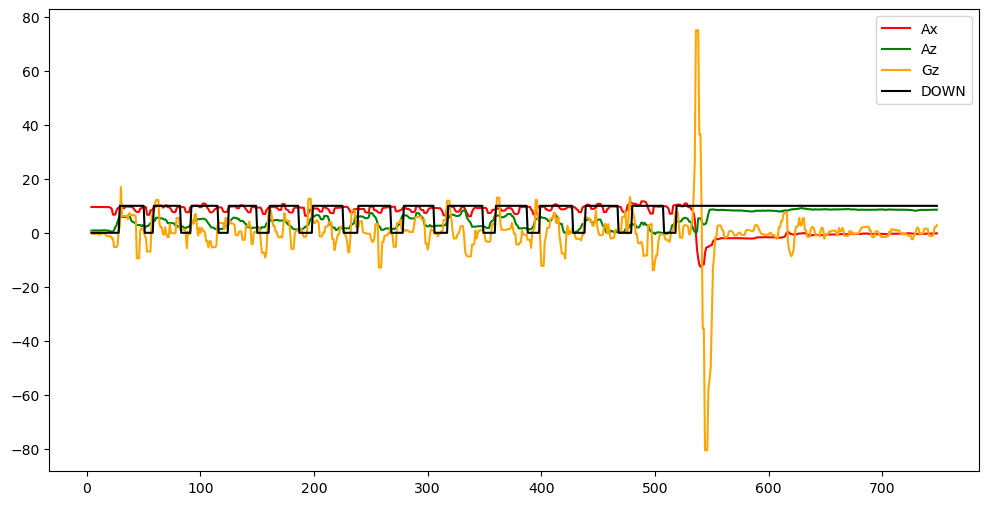

In [224]:
plt.figure(figsize=(12,6))
plt.plot(df['Ax'], color='red', label='Ax')
# plt.plot(df['Ay'], color='blue', label='Ay')
plt.plot(df['Az'], color='green', label='Az')
plt.plot(df['Gz'], color='orange', label='Gz')
plt.plot(df['DOWN']*10, color='black', label='DOWN')
# plt.plot(df['prob']*10, color='blue', label='prob')
plt.legend()
plt.show()

## Preparazione datasets

In [225]:
## Y è l'output che utilizziamo come training
## X sono le feautures, BISOGNA togliere la Y dalle colonne feautures 
y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','UP'], axis=1, inplace=True)

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Modelli

## DecisionTree Classifier

In [226]:
potatura = 0.005

Accuracy:   0.925
Precision:  0.884
Recall:     0.971


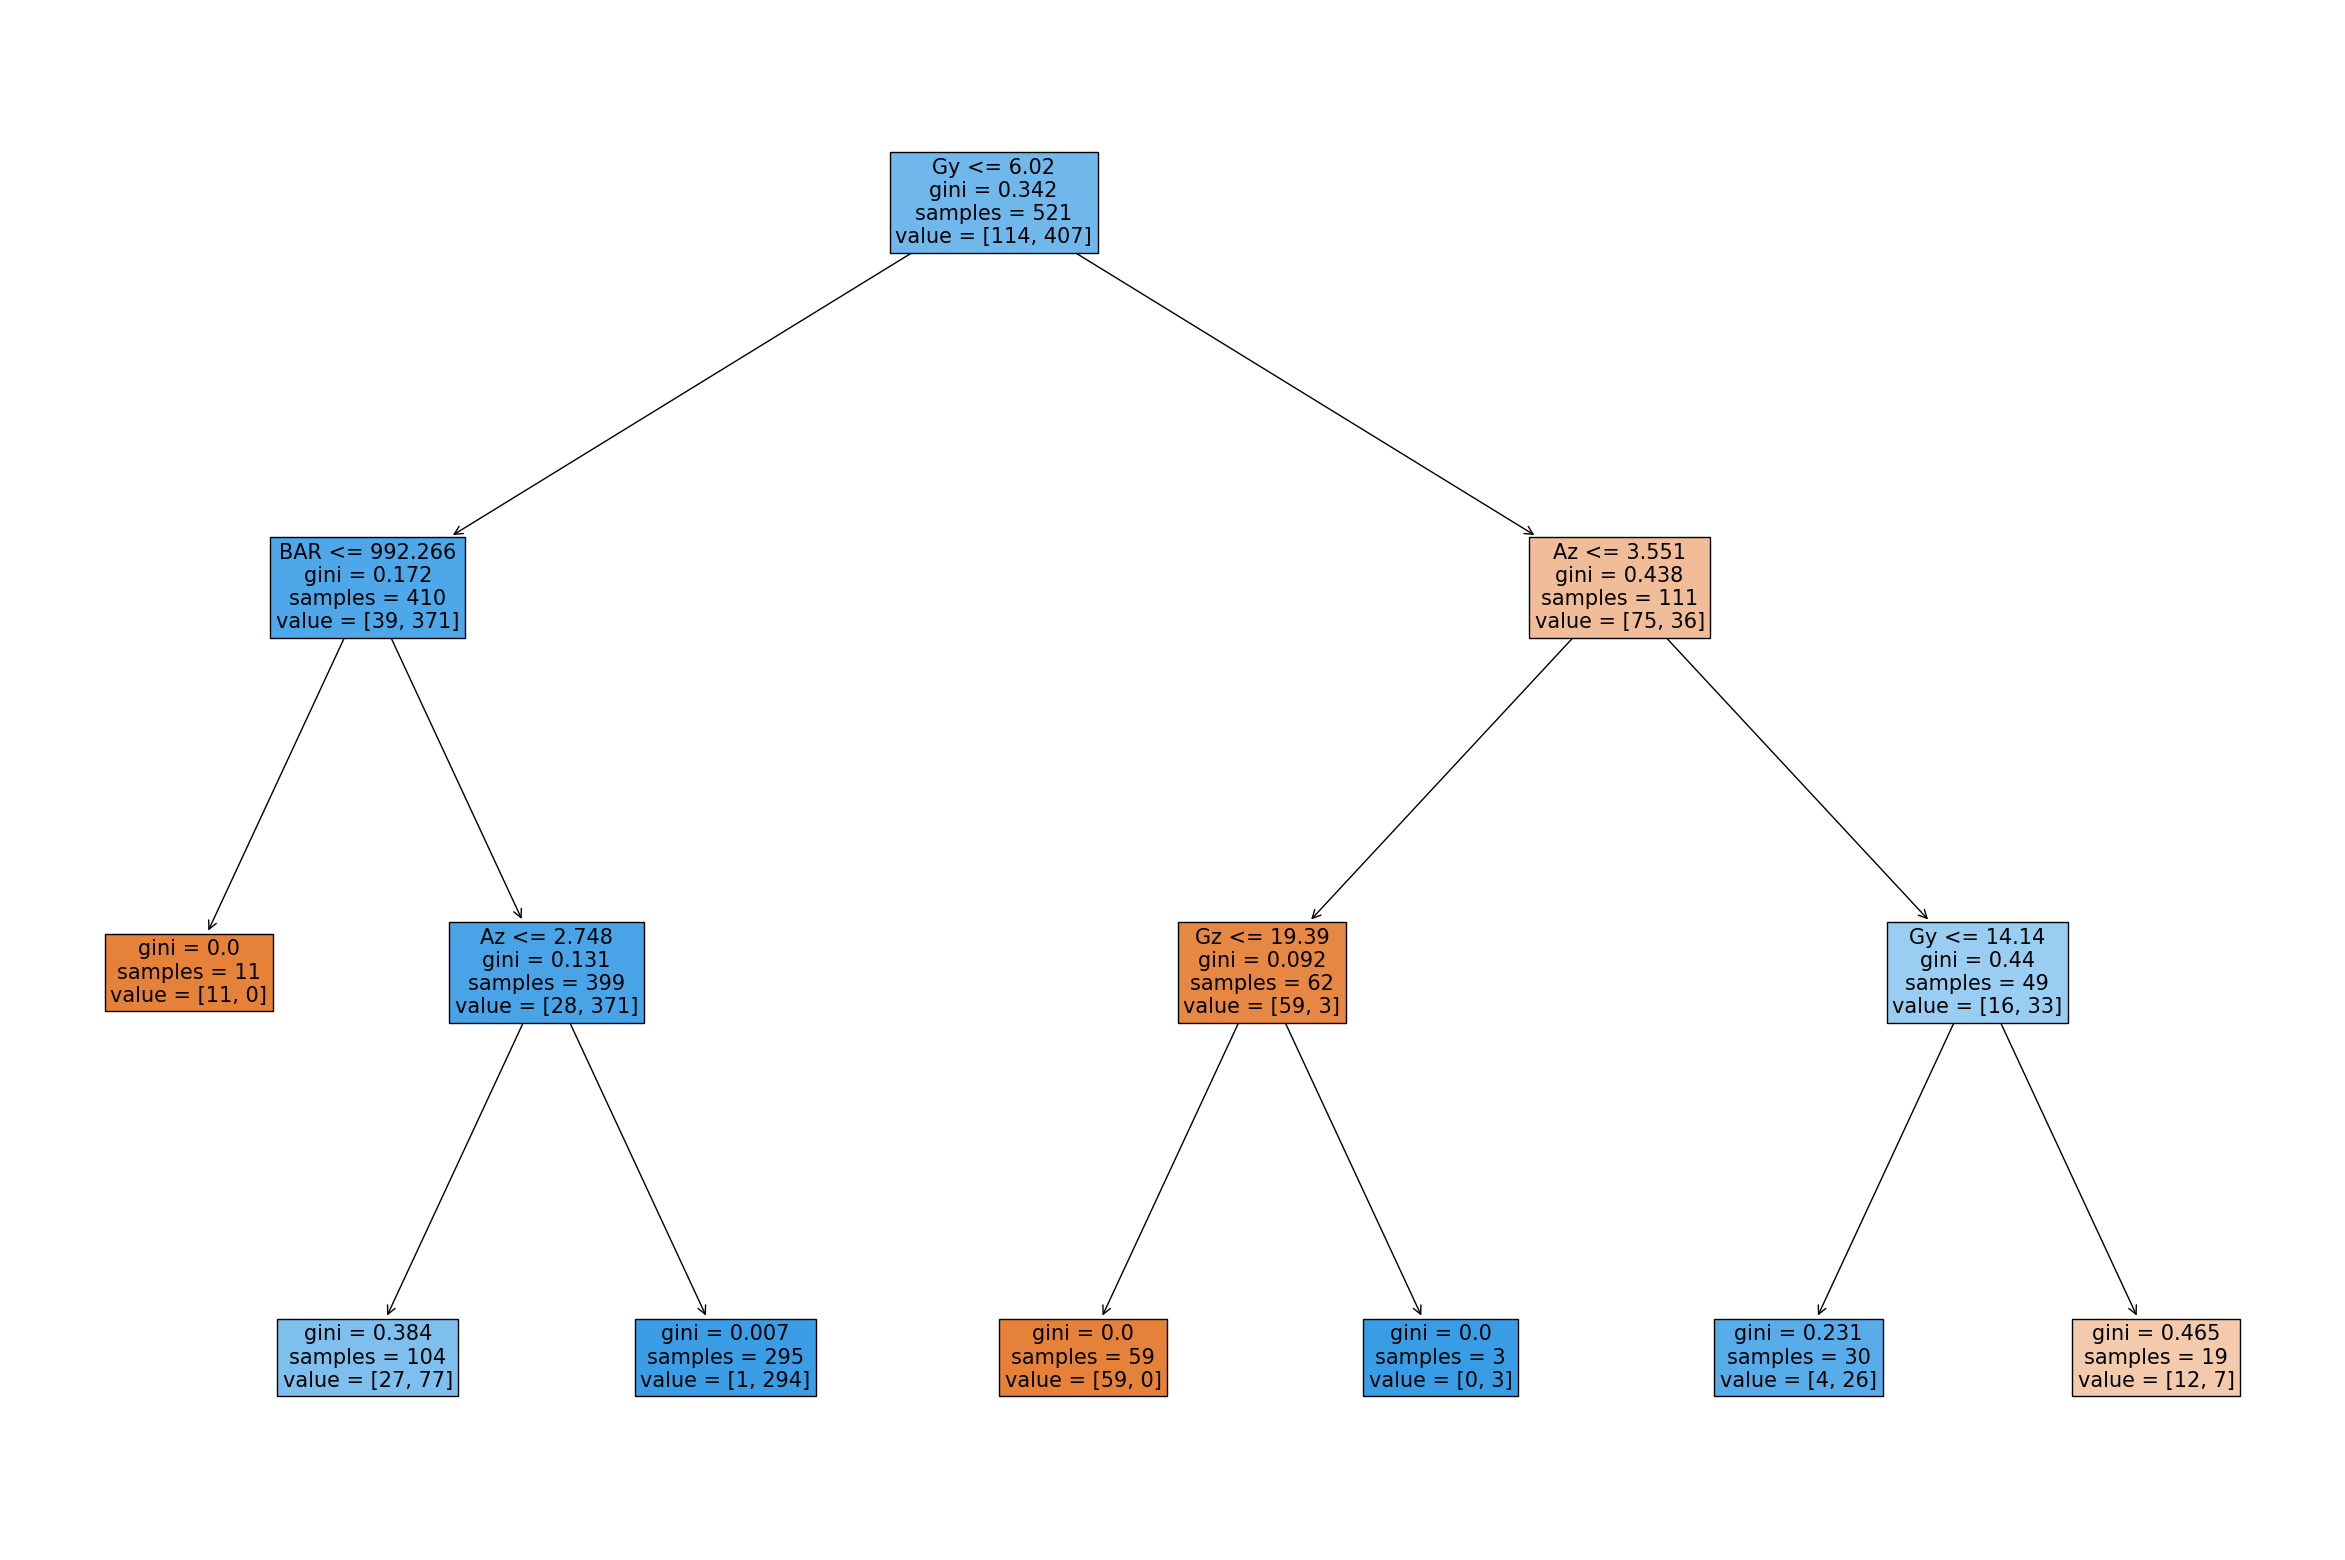

In [227]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=max_lunghezza_albero , ccp_alpha=potatura)
clf = clf.fit(X_train, y_train)
param = clf.get_params()
predictions = clf.predict(X_test)
accuracy = clf.score(X_train, y_train)
precision = precision_score(y_true= y_test, y_pred=predictions)
recall = recall_score(y_true= y_test, y_pred=predictions)

print('Accuracy:  ', round(accuracy,3))
print('Precision: ', round(precision,3))
print('Recall:    ', round(recall,3))

from sklearn import tree
feature_names = X.columns
fig = plt.figure(figsize=(30,20))
_= tree.plot_tree(clf, 
        feature_names=feature_names, 
        filled=True, fontsize=15)


In [228]:
##importanza features
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)

print(feature_importance.head(10))
important_features = list(feature_importance[feature_importance[0]>0].index)
# feature_importance.head(10).plot(kind='bar')

            0
Gy   0.537195
Az   0.261579
BAR  0.153789
Gz   0.047438
Ax   0.000000
Ay   0.000000
Gx   0.000000
P    0.000000
R    0.000000


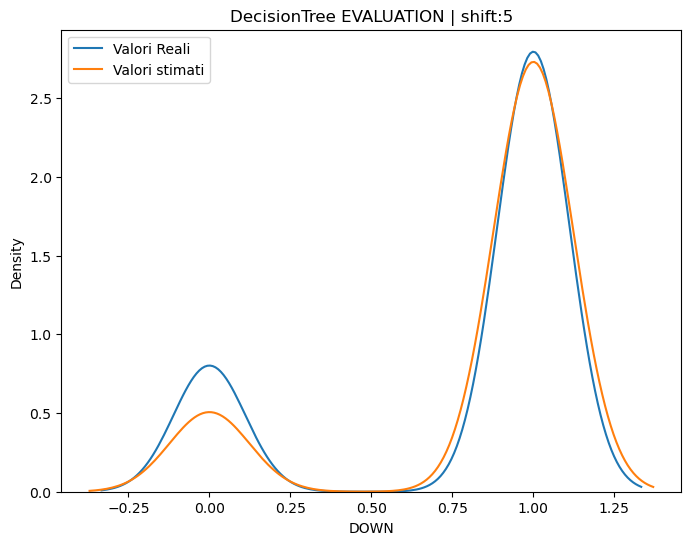

In [229]:
plt.figure(figsize=(8, 6))
plt.title('DecisionTree EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(predictions , label='Valori stimati')
plt.legend()
plt.show()

## Logistic Regression

In [230]:
log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('Termine noto:',log_reg.intercept_[0])

     Logistic
Reg          
Ay  -1.968845
Ax  -0.540401
Az    0.42783
Gz   0.204768
Gy  -0.138818
Gx   -0.05539
BAR  0.010878
P         0.0
R         0.0
Termine noto: -4.420419855434694e-05


LogReg Training Accuracy is:  0.9001919385796545
LogReg Testing Accuracy is:  0.8526785714285714


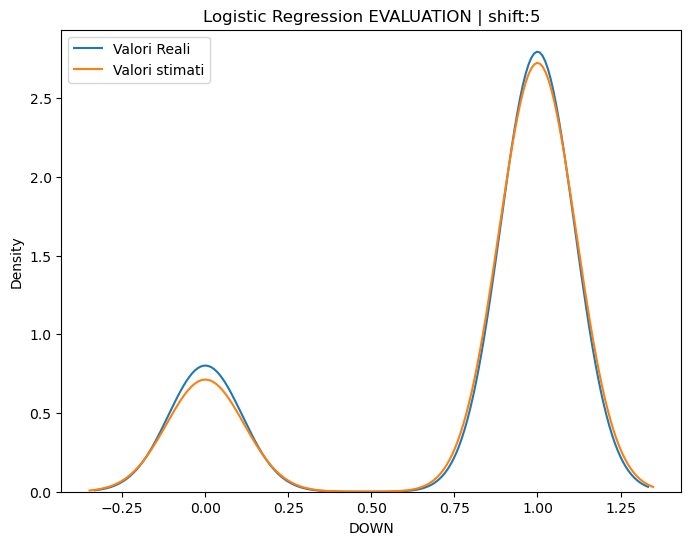

In [231]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()


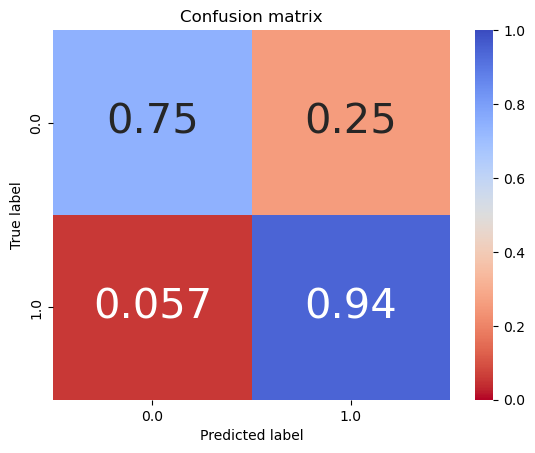

In [232]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [233]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

The True Positive Rate is: [0.74561404 0.94348894]
The Precision is: [0.78703704 0.92978208]
The False positive rate is: [0.05651106 0.25438596]
The False Negative Rate is:  [0.25438596 0.05651106]


## Regressione Lineare Multivariata

          RLM
Reg          
Ay  -0.140318
Az   0.077815
Ax  -0.015406
Gz   0.011749
Gy  -0.009962
Gx  -0.006171
BAR -0.001872
P         0.0
R         0.0
Termine noto: 2.820119915659693
 
Precisione:  0.4086476576135317


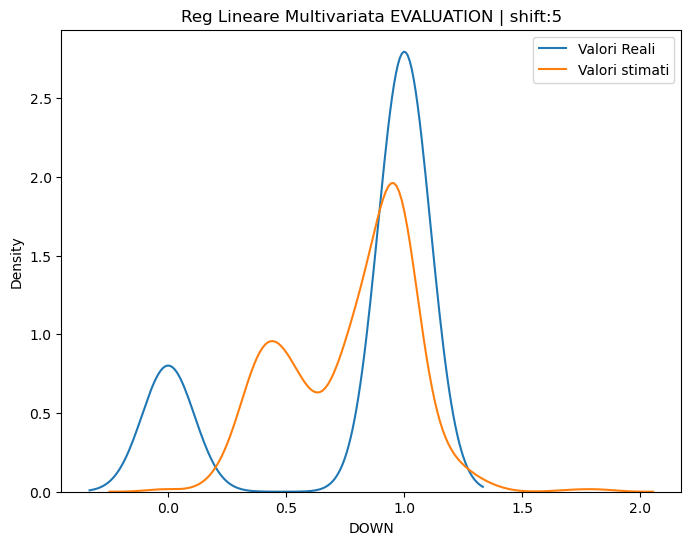

In [234]:
mlr = LinearRegression()
y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','UP'], axis=1, inplace=True)

mlr.fit(X, y)
Y_hat = mlr.predict(X)
b0 = mlr.coef_
b1 = mlr.intercept_

reg = pd.DataFrame(data =[X.columns, b0]).T
reg.rename(columns={0:'Reg',1:'RLM'}, inplace=True)
reg.set_index('Reg', inplace=True)
reg.sort_values(by='RLM', key=abs, ascending=False , inplace=True)

print(reg)
print('Termine noto:',b1)
print(' ')
print('Precisione: ', mlr.score(X, y))

plt.figure(figsize=(8, 6))
plt.title('Reg Lineare Multivariata EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(Y_hat , label='Valori stimati')
plt.legend()
plt.show()
